## Summary

<p>
In this project components and models of neural networks are developed.
</p> 

<p>
Artificial neural networks (neural networks) are inspired by biological structures like the brain. Basically they are consisting of nodes (neurons) and edges (vectors). The goal is to extract information from the input values and generate output values like predictions, pattern or structures not evident in the input values. The information inputs are transformed on the path through networks with matrice multiplications and activation functions. This makes deep learning networks as a special type of neural networks capable to handle non-linear data.
</p> 

<p>    
The simplest models are the perceptron and the feedforward neural network. Based on those models with increasing complexity are developed adding more connections and hidden layers to the network. This project is focusing on the principal components and techniques of neural network. Then sklearn is applied develop network models to make predictions on synthetically created data. Some of techniques applied here are
</p> 

<p>
Some of techniques applied here are:
</p> 

 <ul>
  <li>Train-Test-Split</li>
  <li>SGDRegressor</li>
  <li>Feedforward neural network</li>
  <li>Nonlinear Activation Functions</li>
  <li>SGDRegressor</li>
  <li>MLPClassifier</li>
  <li>hyperparameter tuning</li>
  <li>grid search</li> 
    
    
</ul>

## Import packages

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

plt.rcParams['font.size'] = 11
plt.rcParams['font.style'] = 'italic'
plt.rcParams['font.family'] = 'monospace'

import numpy as np
import scipy.stats
import math
import os
import types

import sklearn
print("SKlearn version: ", sklearn.__version__)
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



SKlearn version:  0.20.3


### Neural networks

<p>
From a technical standpoint of view neural networks are 
a series of matrix multiplications of input values (feature vectors) and 
weights (coefficients) transformed by mostly nonlinear activation 
funtions (Sigmoid, tanh, Relu). This results in predictions about
the nature of the input values. For example in binary classification it
predicts a picture as showing a cat or not a cat.
</p> 

<p>
The simplest types of a neural networks are the perceptron and the feed
forward network. Based on those different other architectures of neural networks with hidden layers and increasing complexity are developed.
</p> 

<a href="http://www.asimovinstitute.org/neural-network-zoo/"><img src="NeuralNetworkZoo.png" style="width:300px; height:400px" title="NeuralNetworkZoo by asimovinstitute" alt="NeuralNetworkZoo by asimovinstitute"></a>

<p>
Below simple feed forward networks are created with synthetic data.
</p> 

### Creating simple feedforward neural networks with synthetic data 

#### Make data set 1

In [2]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.
# make_regression.html
# n_samples=2000 - generating a data set with 2000 observations

X, y, coeff = \
make_regression(n_samples=2000, n_features=100, n_informative=10, 
                n_targets=1, bias=0.0, effective_rank=None, 
                tail_strength=0.5, noise=0.0, shuffle=True, coef=True, 
                random_state=42)

#### Explore data set 1

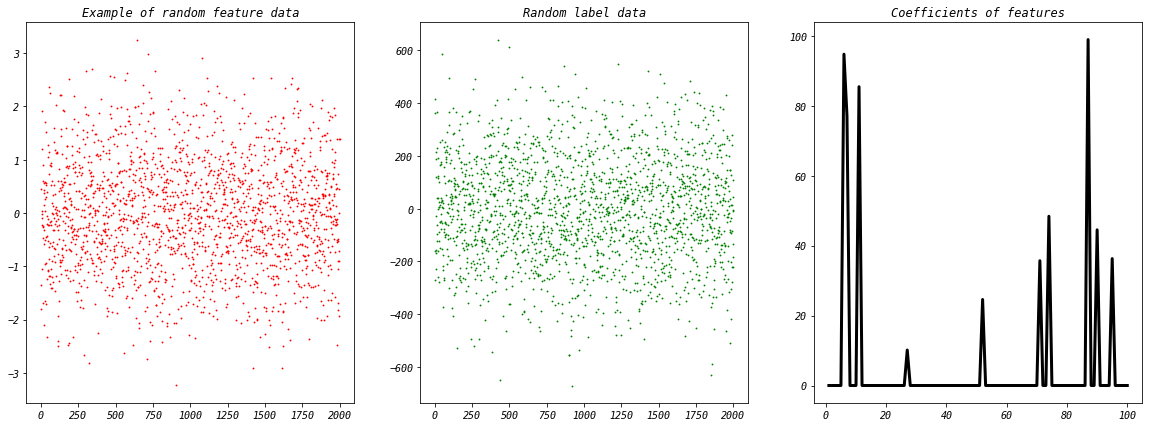

In [3]:
fig, axis = plt.subplots(1,3, figsize=(20,7))
axis[0].scatter(np.linspace(1,2000, 2000), X[:,0], s=0.7, color="red")
axis[0].set_title("Example of random feature data")
axis[1].scatter(np.linspace(1,2000, 2000), y, s=0.7, color="green")
axis[1].set_title("Random label data")
axis[2].plot(np.linspace(1,100, 100), coeff , color="black", linewidth=3)
axis[2].set_title("Coefficients of features")
plt.show()

In [4]:
# The input samples.
print(X.shape)
print(type(X))
print(X[:10, :5])

(2000, 100)
<class 'numpy.ndarray'>
[[-1.35815923  0.40220955 -2.08989769  0.07108867 -1.40468562]
 [ 0.44230216 -0.96176242  0.0220677   1.28491678  0.86527116]
 [-1.79426038 -0.21276928  0.44360184  0.73280387 -1.04529139]
 [ 0.04030875 -0.67724589  1.83830752  0.96058337 -0.79635303]
 [ 1.20522477 -0.62333528 -1.04814845  2.00937256  1.29299932]
 [-0.10369239  0.98708167  0.1906027   0.65608993  0.14096928]
 [-0.01834452 -1.38494363 -0.25149937  0.04821374 -0.80844663]
 [-0.22115846  0.96938837  0.17109178  0.01308608 -0.11389232]
 [ 1.90609755  0.85644184  0.82359104 -1.03137808  1.12415375]
 [-1.04416118 -1.46568715  1.61857176 -0.10255993 -0.55702191]]


In [5]:
# The output values
print(y.shape)
print(type(y))
print(y[:10])

(2000,)
<class 'numpy.ndarray'>
[-270.41459509  364.26505425  417.19448696 -161.61470603 -228.66409192
  188.41281483  120.16165537 -156.23517039  214.56679124 -168.85168031]


In [6]:
# The coefficient of the underlying linear model. 
# It is returned only if coef is True.
print(coeff.shape)
print(coeff[:10])

(100,)
[ 0.          0.          0.          0.          0.         94.69130681
 77.06252727  0.          0.          0.        ]


In [7]:
X_df = pd.DataFrame(X)
print(X.shape)
print(X_df.loc[:4, :5])

(2000, 100)
          0         1         2         3         4         5
0 -1.358159  0.402210 -2.089898  0.071089 -1.404686  0.382948
1  0.442302 -0.961762  0.022068  1.284917  0.865271  1.347678
2 -1.794260 -0.212769  0.443602  0.732804 -1.045291  1.384645
3  0.040309 -0.677246  1.838308  0.960583 -0.796353 -0.370286
4  1.205225 -0.623335 -1.048148  2.009373  1.292999 -1.555954


In [8]:
y_df = pd.Series(y)
print(len(y_df))

2000


Is there any correlation between the generated features?

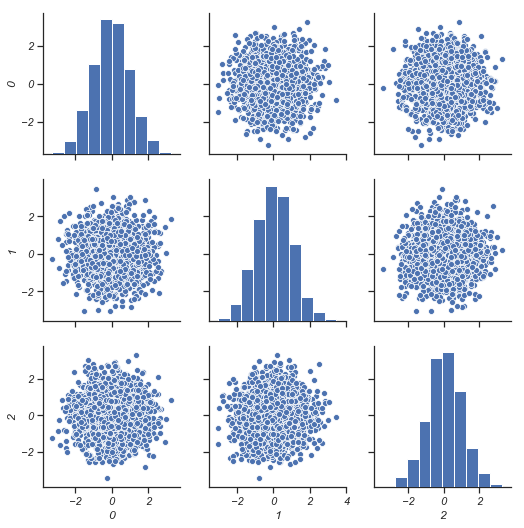

In [9]:
X_features_pairplot = X_df.loc[:, 0:2]
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(X_features_pairplot, palette="pastel")
# The data points are randomly distributed

#### Train-Test-Split

In [10]:
X_train_1, X_test_1, y_train_1, y_test_1 = \
train_test_split(X_df, y_df , test_size=0.3)

In [11]:
print(X_train_1.shape)
print(y_train_1.shape)

print(X_test_1.shape)
print(y_test_1.shape)


(1400, 100)
(1400,)
(600, 100)
(600,)


#### Applying a data model with a Stochastic Gradient Descent Regressor to data set 1

<p>The goal here is to make predictions based on a

<a href="https://en.wikipedia.org/wiki/Feedforward_neural_network">
Feedforward neural network</a>. The feedforward neural network was the first and simplest type of artificial neural network devised.
   

</p> 

In [12]:
def train_model(features, labels):
    linear_clf = SGDRegressor(max_iter=1000, tol=1e-3)
    linear_clf.fit(features, labels)
    weights = linear_clf.coef_
    return weights

In [13]:
weights_1 = train_model(X_train_1, y_train_1)
print(weights_1[:4])
print(len(weights_1))

[-0.00087934 -0.00037772  0.00019897  0.00024439]
100


### Feedforward neural network

<p>
In this type of network information moves only in one direction from
the input nodes (through the hidden nodes) to the output nodes.
This is the simplest type of neural network without any recursion 
and cycles.
</p> 

<a href="https://en.wikipedia.org/w/index.php?curid=8201514"><img src="Feed_forward_neural_net.gif" alt="Smiley face" height="300" width="300"></a>


In [14]:
def Feedforward_neural_network(features, weights):
        
    # checking if input is an np.array
    # otherwise it is converted
    # isinstance: further info
    # https://docs.quantifiedcode.com/python-anti-patterns/readability
    # /do_not_compare_types_use_isinstance.html
    
    if isinstance(features, np.ndarray):
        features_array = features
        
    elif isinstance(features, list):
        features_array = features.asarray()
        
    elif isinstance(features, pd.DataFrame):
        features_array = features.to_numpy()
        
    else:
        print("Type error: needs numpy array, list or data frame")
        
    predictions=features_array.dot(weights)
    
    return predictions

In [15]:
predictions_1 = Feedforward_neural_network(X_train_1, weights_1)
print(predictions_1[:5])
print(np.shape(predictions_1))

[ 202.19110709 -266.76582598   -1.88715724  238.20541871   -9.12038249]
(1400,)


<b>Understanding</b> the matrix multiplication or the 
<a href="https://www.mathsisfun.com/algebra/matrix-multiplying.html">
dot-product</a>. The dot-product must suffice two conditions:
<ul>
<li>The number of columns of the 1st matrix must equal the number of rows of the 2nd matrix.</li>
<li>And the result will have the same number of rows as the 1st matrix, and the same number of columns as the 2nd matrix.</li>
</ul> 

<p>Both conditions are met.</p> 

In [16]:
# input matrix
print("features: ", len(X_train_1))
print(np.ndim(X_train_1))
print(np.shape(X_train_1))

# multiplicator matrix
print("weights: ", len(weights_1))
print(np.ndim(weights_1))
print(np.shape(weights_1))

# output matrix: product
print("predictions: ", len(predictions_1))
print(np.ndim(predictions_1))
print(np.shape(predictions_1))


features:  1400
2
(1400, 100)
weights:  100
1
(100,)
predictions:  1400
1
(1400,)


Generic use of the dot product


In [17]:
a=np.array([0,1])
b=np.array([1,0])
np.dot(a,b) 


0

In [18]:
X_555=np.array([[1,0],[0,1]])
Y_555=np.array([[2,1],[1,2]]) 
Z_555=np.dot(X_555,Y_555)
Z_555

array([[2, 1],
       [1, 2]])

#### Make data set 2

In [19]:
data_2 = make_regression(n_samples=100, n_features=3, random_state=1)

In [20]:
features = pd.DataFrame(data_2[0])

##### Explore data set 2

In [21]:
print(type(data_2))
print(len(data_2))

<class 'tuple'>
2


In [22]:
print(features.shape)
print(features.head())

(100, 3)
          0         1         2
0  1.293226 -0.617362 -0.110447
1 -2.793085  0.366332  1.937529
2  0.801861 -0.186570  0.046567
3  0.129102  0.502741  1.616950
4 -0.691661 -0.687173 -0.396754


In [23]:
labels = pd.Series(data_2[1])
print(len(labels))
print([labels[i] for i in [1,12,21,44,56,81, 99 ]])

100
[25.512450298164126, 20.274196014121593, -77.50879777743367, -56.01743267103851, -194.05903549299484, -41.24815160452101, -18.761622014302368]


#### Train-Test-Split

In [24]:
# Add a bias column to the features data set
features['bias'] = 1
print(features.columns)

Index([0, 1, 2, 'bias'], dtype='object')


In [25]:
X_train_2, X_test_2, y_train_2, y_test_2 = \
train_test_split(features, labels , test_size=0.3)

In [26]:
print(X_train_2.shape)
print(y_train_2.shape)
print(X_test_2.shape)
print(y_test_2.shape)

(70, 4)
(70,)
(30, 4)
(30,)


#### Applying a data model with a Stochastic Gradient Descent Regressor to data set 2

In [27]:
weights_2 = train_model(X_train_2, y_train_2)
print(len(weights_2))
print(weights_2)

4
[4.41533197e+01 9.89113590e+01 5.80891089e+01 1.10128272e-02]


In [28]:
predictions_2 = Feedforward_neural_network(X_train_2, weights_2)
print(len(predictions_2))
print(predictions_2[:10])

70
[ 149.36522133 -324.3509882  -145.39920801   70.36013748   63.75944502
 -145.66576821 -178.18467359  107.84904701  190.71474049   19.66702254]


#### Make data set 3

In [29]:

class_data = make_classification(n_samples=100, 
                                 n_features=4, random_state=1)
class_features = pd.DataFrame(class_data[0])
class_labels = pd.Series(class_data[1])

class_features["bias"] = 1

In [30]:
print(class_features.shape)
print(class_labels.shape)
print(class_labels.T.shape)

(100, 5)
(100,)
(100,)


In [31]:
class_features_df = pd.DataFrame(class_features)
class_features_df.shape
print(class_features_df.columns)
class_features_df.loc[:5,2]

Index([0, 1, 2, 3, 'bias'], dtype='object')


0    2.783862
1    1.760475
2    0.468043
3   -0.759553
4   -1.319113
5   -0.807991
Name: 2, dtype: float64

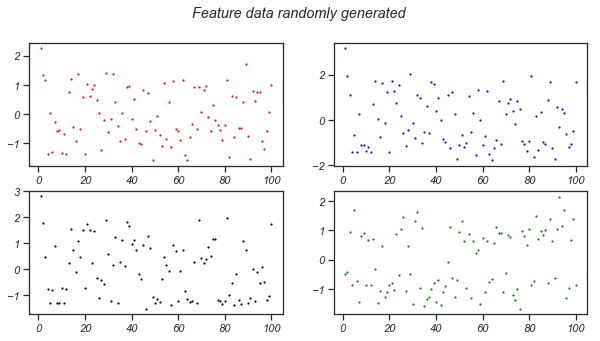

In [32]:
fig, axis = plt.subplots(2,2, figsize=(10,5))
plt.suptitle("Feature data randomly generated")
axis = axis.ravel()
color_1 = ['red', 'blue', 'black', 'green']
for i in [0,1,2,3]: 
        axis[i].scatter(np.linspace(1,100,100), 
                        class_features[i], s=1.3,
                        color=color_1[i])

### Nonlinear Activation Functions

<p>
The method of choice to model numerical continuous data is linear
regression. However most data sets are not following a linear pattern.
Data transformations enable a linearization or binarization of non linear data. This is done with Nonlinear activation functions, which are transforming input into outputs.
</p>    
    
<p>    
In artificial neural networks inspired by biological neural networks like the brain these functions are mimicking the output electrical action potentials.
</p>

<p>
In the simplest form this tell the node or neuron to binary firing -1 or not - 0. Such binary functions (sigmoid, tanh) are often used in binary classification problems. ReLu activation functions, which are giving a
value or weight to the matrix computation are used with continuous
variables in regression problems.
</p>
<a href="https://en.wikipedia.org/wiki/Activation_function">Wikipedia</a>

#### Perform a nonlinear transformation of the input features the sigmoid function

In [33]:

def log_train(class_features, class_labels):
    sg = SGDClassifier(max_iter=1000, tol=0.001)
    sg.fit(class_features, class_labels)
    return sg.coef_

def sigmoid(linear_combination):
    return 1/(1+np.exp(-linear_combination))

def log_feedforward(class_features, log_train_weights):
    linear_combination = np.dot(class_features, log_train_weights.T)
    log_predictions = sigmoid(linear_combination)
    log_predictions[log_predictions >= 0.5] = 1
    log_predictions[log_predictions < 0.5] = 0
    return log_predictions




In [34]:
log_train_weights = log_train(class_features, class_labels)
print(log_train_weights)
print(log_train_weights.shape)

[[ 16.23492959   0.81319036 -21.39728293  47.98711194   3.03122158]]
(1, 5)


In [35]:
log_predictions = log_feedforward(class_features, log_train_weights)
log_predictions[:10]

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.]])

In [36]:
# def sigmoid(linear_combination):
    # return 1/(1+np.exp(-linear_combination))

g_12 = np.linspace(-100,100,50)
sigmoid_12 = sigmoid(g_12)


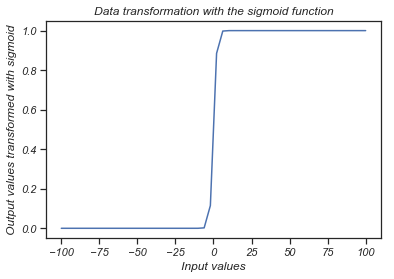

In [37]:
fig, ax12 = plt.subplots(1)
ax12.plot(g_12, sigmoid_12)
ax12.set_xlabel('Input values')
ax12.set_ylabel('Output values transformed with sigmoid')
ax12.set_title('Data transformation with the sigmoid function')
plt.show()

The sigmoid transformation functions normalizes all values between 0 an 1. It tells the node to fire - 1 or not - 0.

#### ReLU Activation Function

In [38]:
# Creating a ReLU Activation function, which is able to transform
# single values or list of values.


def relu(z):
    
    p = 0
    e = []
    
    if isinstance(z, int) or isinstance(z, float):
        if z <= 0:
            p = 0
        elif z > 0:
            p = z
        return p
            
    elif isinstance(z, list) \
    or isinstance(z, np.ndarray):
        
        for i in z:
            if i <= 0:
                e.append(0)
                
            elif i > 0:
                e.append(i)
        return e
            
    

In [39]:
h = np.linspace(-2, 2, 20)
print(h)
print(type(h))

relu_y = relu(h)
print(relu_y)

[-2.         -1.78947368 -1.57894737 -1.36842105 -1.15789474 -0.94736842
 -0.73684211 -0.52631579 -0.31578947 -0.10526316  0.10526316  0.31578947
  0.52631579  0.73684211  0.94736842  1.15789474  1.36842105  1.57894737
  1.78947368  2.        ]
<class 'numpy.ndarray'>
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.10526315789473673, 0.3157894736842106, 0.5263157894736841, 0.7368421052631575, 0.9473684210526314, 1.1578947368421053, 1.3684210526315788, 1.5789473684210522, 1.789473684210526, 2.0]


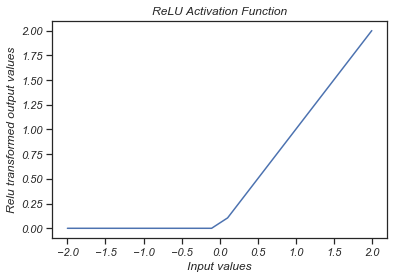

In [40]:
plt.plot(h, relu_y)
plt.title('ReLU Activation Function')
plt.xlabel('Input values')
plt.ylabel('Relu transformed output values')
plt.show()

The ReLU is a one-sided function. It generates either 0 or
the input value. This is clearly illustrated here. 
Another trait is that not all neurons are actvitated because of this.
Both characteristic are also appear in biological neural networks.

#### Hyperbolic tangent function or tanh activation function

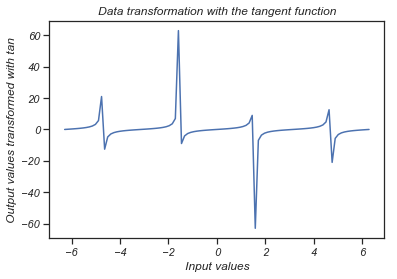

In [41]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)

tan_y=np.tan(x)

fig, ax1 = plt.subplots(1)
ax1.plot(x, tan_y)
ax1.set_xlabel("Input values")
ax1.set_ylabel("Output values transformed with tan")
ax1.set_title("Data transformation with the tangent function")
plt.show()

The pure tangent function generates a periodic pattern, which is not 
found in machine learning applications. Instead the tanh function
is used. This is a ration between y and x values and generates values
between -1 and 1.

In [42]:
x = np.linspace(-40, 40, 100)

tanh = np.tanh(x)

print(type(x))
print(x.shape)
print(tanh[:15])



<class 'numpy.ndarray'>
(100,)
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


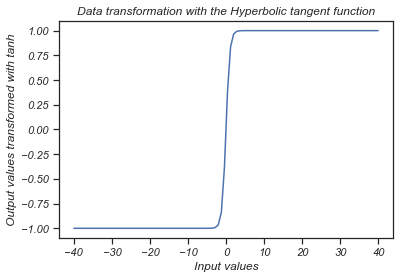

In [43]:
fig, ax1 = plt.subplots(1)
ax1.plot(x, tanh)
ax1.set_xlabel("Input values")
ax1.set_ylabel("Output values transformed with tanh")
ax1.set_title("Data transformation with the Hyperbolic tangent function")
plt.show()

### Multi-layer networks (deep neural networks)

<p>This type of networks consists of network an input layer, at least
one hidden layer and the output layer. The layers consists of nodes, which are connected with edges or vectors. The nodes carry values and the edges can carry weights. The data is then transformed with activation function. On the path through the hidden layers increasingly more specific information is identified and extracted from lower more general (a curved line) to higher order (eyes) information.<br>
These networks can be simple feed forward neural networks, but are unfolding their full potential when using forms of recursion like backpropagation.
</p> 

 <img src="deep-learning-image.jpg" alt="multi-layered neural network" height="1000" width="1000"> 

#### Generating non linear data

In [44]:
moon_data = make_moons(n_samples=10000, noise=0.4, random_state=42)

print(type(moon_data))
print(len(moon_data))

<class 'tuple'>
2


In [45]:
moon_features = pd.DataFrame(moon_data[0])
print(moon_features.shape)

moon_labels = pd.DataFrame(moon_data[1])
print(moon_labels.shape)

(10000, 2)
(10000, 1)


Text(0.5, 1.0, 'Labels')

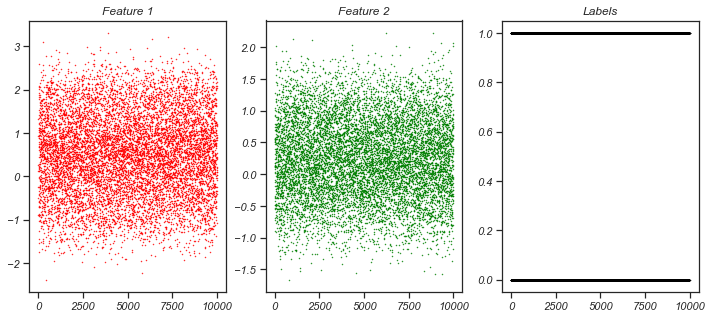

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,5), sharex=True)
ax1.scatter(np.linspace(1,10000, 10000), moon_features[0], 
            color="red", s=0.2 )
ax1.set_title("Feature 1")
ax2.scatter(np.linspace(1,10000, 10000), moon_features[1], color="green",
            s=0.2)
ax2.set_title("Feature 2")
ax3.scatter(np.linspace(1,10000, 10000), moon_labels, color="black",
            s=0.2)
ax3.set_title("Labels")

There are no relationships noticeable in the features.
The labels are binary distributed.

#### Visualizing non linear data in a 3 dimensional plot

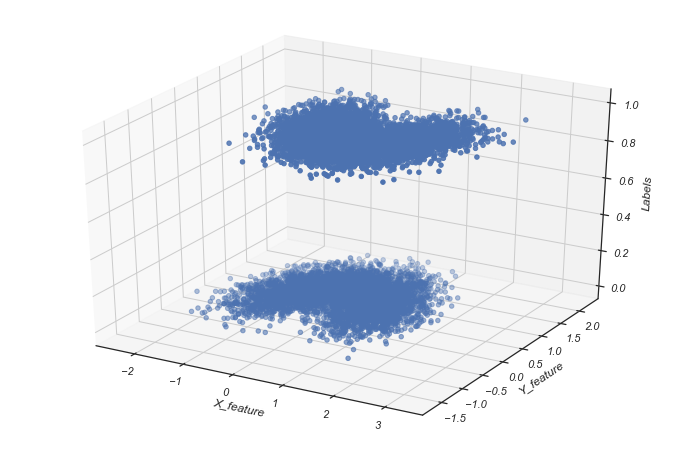

In [47]:
fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(xs=moon_features.iloc[:,0], 
          ys=moon_features.iloc[:,1], zs=moon_labels, s=20, 
          c=None, depthshade=True)
ax.set_xlabel('X_feature')
ax.set_ylabel('Y_feature')
ax.set_zlabel('Labels')
plt.show()

#### Comparing models

<p>Comparing different models like the logistic regression model and neuronal network models with different activation functions.</p> 



 

#### Making a train-test-split

In [48]:
X_train_44, X_test_44, y_train_44, y_test_44 = \
train_test_split(moon_features, moon_labels, test_size=0.3, 
                 random_state=0)


print(X_train_44.shape)
print(X_test_44.shape)
print(y_train_44.shape)
print(y_test_44.shape)

print(type(X_train_44))

(7000, 2)
(3000, 2)
(7000, 1)
(3000, 1)
<class 'pandas.core.frame.DataFrame'>


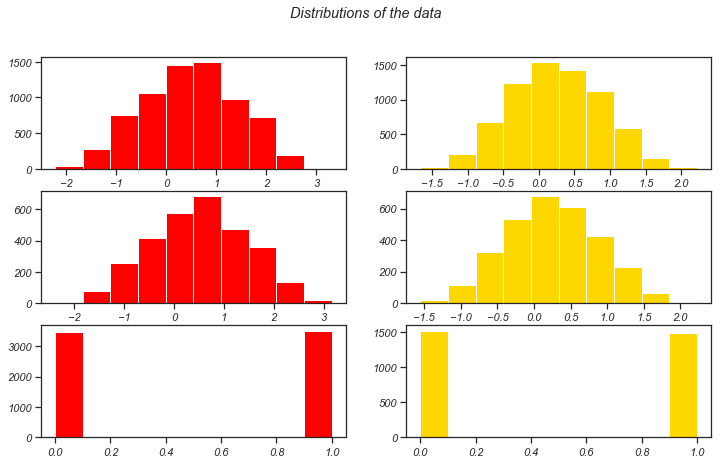

In [49]:

fig, axis = plt.subplots(3,2, figsize=(12,7))
plt.suptitle("Distributions of the data")

axis[0,0].hist(X_train_44[0], color="red")
axis[0,1].hist(X_train_44[1], color="gold")
axis[1,0].hist(X_test_44[0], color="red")
axis[1,1].hist(X_test_44[1], color="gold")
axis[2,0].hist(y_train_44[0], color="red")
axis[2,1].hist(y_test_44[0], color="gold")    

plt.show()

##### Model 1: logistic regression model

<p>
In general logistic regression can be understood as neural network
with one hidden layer.
</p> 

In [50]:
clf = \
LogisticRegression(random_state=0, solver='lbfgs', 
                   multi_class='multinomial')

clf.fit(X_train_44, np.array(y_train_44).ravel())

log_predictions=clf.predict(X_test_44)
print(log_predictions[:10])

log_accuracy=round(accuracy_score(y_test_44 , log_predictions),4)
print(log_accuracy)

[1 1 0 0 0 1 1 1 1 1]
0.8253


####  Building neural networks with synthetic data using the sklearn.neural_network.MLPClassifier
<p>It is a multi-layer Perceptron classifier, which can generate 
binary predictions. The labels of the data are binary.
In general the first choice of building neural 
networks is the <a href="https://www.tensorflow.org/">Tensorflow</a> 
framework, which scales to large quantities of data (Big Data).</p> 

<p>
The essential parameter is hidden_layer_sizes: tuple, 
length = n_layers - 2, default (100, ). The ith element 
represents the number of neurons in the ith hidden layer.
</p> 


##### Model 2: neuronal network with the logistic sigmoid activation function


In [51]:
# Building the model
# It is necessary to set the max_iter parameter to a sufficient size
# Otherwise it is possible that the calculations will not converge

mlp_1_sig = \
MLPClassifier(hidden_layer_sizes=(10, ), max_iter=1000,
              activation='logistic', random_state=0)

In [52]:
# Fit the data
mlp_1_sig.fit(X_train_44, np.ravel(y_train_44))
# np.ravel flattens the array to dim 1, which is expected.

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [53]:
# Making predictions
mlp_1_predictions = mlp_1_sig.predict(X_test_44)
print(type(mlp_1_predictions))
print([mlp_1_predictions[i] for i in [9,15,177, 503, 706, 1080, 2020]])
# It produces 0 or 1 as predictions, which is expected

<class 'numpy.ndarray'>
[1, 0, 0, 0, 1, 0, 0]


In [54]:
# Evaluate with accuracy
accuracy_1_sigmoid = round(accuracy_score(y_test_44, mlp_1_predictions),4)
print(accuracy_1_sigmoid)

0.8253


In [55]:
dict_1 = {'model':['logreg', 'mlp logistic 10'], 
          'accuracy': [log_accuracy, accuracy_1_sigmoid] }
df_acc = pd.DataFrame(dict_1)
df_acc 

,model,accuracy
0,logreg,0.8253
1,mlp logistic 10,0.8253


##### Neural network 3: reLu activation function

In [56]:
mlp_2_relu = \
MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, activation="relu",
              random_state=0).fit(X_train_44, np.ravel(y_train_44))

In [57]:
mlp_2_relu_predictions = mlp_2_relu.predict(X_test_44)

print(mlp_2_relu_predictions.shape)
print(np.max(mlp_2_relu_predictions))
print(np.min(mlp_2_relu_predictions))

unique_2, counts_2 = np.unique(mlp_2_relu_predictions, return_counts=True)
mlp_2_counts = dict(zip(unique_2, counts_2))

print(mlp_2_counts )
print([i for i in mlp_2_relu_predictions[[5,6,19,1402, 1903, 2099]]])

(3000,)
1
0
{0: 1481, 1: 1519}
[1, 1, 1, 0, 1, 1]


In [58]:
accuracy_2_relu = \
round(accuracy_score(y_test_44, mlp_2_relu_predictions), 2)
print(accuracy_2_relu)

0.86


In [59]:
dict_1 = {'model':['logreg', 'mlp logistic 10', 'mlp relu 10'], 
          'accuracy': [log_accuracy, accuracy_1_sigmoid , accuracy_2_relu] }
df_acc = pd.DataFrame(dict_1)
df_acc 

,model,accuracy
0,logreg,0.8253
1,mlp logistic 10,0.8253
2,mlp relu 10,0.8600


The reLu model performs better in terms of accuracy. Will tuning 
the parameter 'hidden_layer_sizes' lead to a higher accuracy?

##### Neural network 4: tuning 'hidden_layer_sizes' - logistic

In [60]:
nodes= [1, 5, 10, 15, 20, 25]
accuracies_4 = []

for n in nodes:
    mlp_4 = MLPClassifier(hidden_layer_sizes=(n,), 
                          activation='logistic',
                          random_state=23,
                          max_iter=10000).fit(X_train_44, 
                                           np.ravel(y_train_44))
    mlp_4_pred = mlp_4.predict(X_test_44)
    acc_4=accuracy_score(y_test_44, mlp_4_pred)
    accuracies_4.append(round(acc_4, 4))
    

    

In [61]:
dict_4 = {'Hiden layer sizes': nodes,'accuracies':accuracies_4 }
df_4 = pd.DataFrame(dict_4)
df_4

,Hiden layer sizes,accuracies
0,1,0.8253
1,5,0.8247
2,10,0.8253
3,15,0.8250
4,20,0.8243
5,25,0.8247


Text(0, 0.5, 'accuracy')

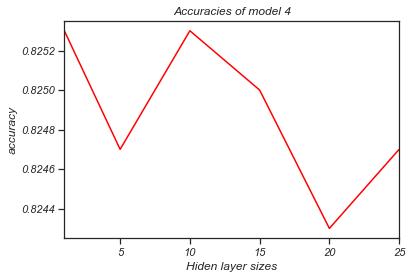

In [62]:
df_4.plot(kind='line', x='Hiden layer sizes', y='accuracies', 
          legend=False, title="Accuracies of model 4",
          color="red")
plt.ylabel("accuracy")

"Hidden layers sizes" fo one produces the best result.

In [63]:
df_4.iloc[0,1]

0.8253

In [64]:
new_row1 = {'model':'m4 - sigmoid - hidden', 'accuracy': df_4.iloc[0,1] }
df_acc=df_acc.append(new_row1, ignore_index=True)
df_acc 

,model,accuracy
0,logreg,0.8253
1,mlp logistic 10,0.8253
2,mlp relu 10,0.8600
3,m4 - sigmoid - hidden,0.8253


This did not improve the accuracy. Maybe the relu activation function
is going to lead to improvements

##### Neural network 5: tuning 'hidden_layer_sizes' - reLu

In [65]:

accuracies_5 = []

for n in nodes:
    mlp_5 = MLPClassifier(hidden_layer_sizes=(n,n), activation='relu', max_iter=1000)
    
    mlp_5.fit(X_train_44, np.array(y_train_44).ravel())
    mlp_5_acc = mlp_5.predict(X_test_44)
    
    acc_5 = accuracy_score(y_test_44, mlp_5_acc)
    accuracies_5.append(round(acc_5,4))

print(accuracies_5)

[0.8243, 0.858, 0.8577, 0.8563, 0.8587, 0.8617]


In [66]:
dict_5 = {'hidden layer sizes': nodes, 'accuracies': accuracies_5}
df_5 = pd.DataFrame(dict_5)
df_5

,hidden layer sizes,accuracies
0,1,0.8243
1,5,0.8580
2,10,0.8577
3,15,0.8563
4,20,0.8587
5,25,0.8617


In [67]:
df_5_max=df_5.accuracies.max()
df_5_max

0.8617

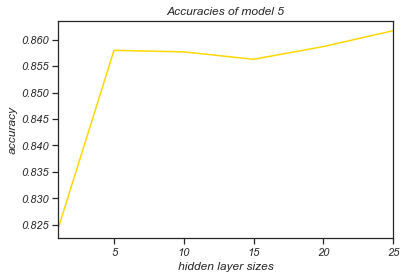

In [68]:
df_5.plot(kind='line', x='hidden layer sizes', y='accuracies', 
          legend=False, title="Accuracies of model 5",
          color="gold")
plt.ylabel("accuracy")
plt.show()

In [69]:
new_row2 = {'model':'m5 - relu - hidden', 'accuracy': df_5_max }
df_acc=df_acc.append(new_row2, ignore_index=True)
df_acc_c1 = df_acc.copy()
df_acc_c1.sort_values(by="accuracy", ascending=False) 

,model,accuracy
4,m5 - relu - hidden,0.8617
2,mlp relu 10,0.8600
0,logreg,0.8253
1,mlp logistic 10,0.8253
3,m4 - sigmoid - hidden,0.8253


##### Neural network 6: increasing 'hidden_layer_sizes'

In [70]:
list(np.arange(30,65,5))

[30, 35, 40, 45, 50, 55, 60]

In [71]:
nodes_2= list(np.arange(100,350,50))

accuracies_6 = []

for n in nodes_2:
    mlp_6 = MLPClassifier(hidden_layer_sizes=(n,n), activation='relu', max_iter=10000)
    
    mlp_6.fit(X_train_44, np.array(y_train_44).ravel())
    mlp_6_acc = mlp_6.predict(X_test_44)
    
    acc_6 = accuracy_score(y_test_44, mlp_6_acc)
    accuracies_6.append(round(acc_6,4))
    
print(accuracies_6 )

[0.8543, 0.8603, 0.8613, 0.8617, 0.8613]


In [72]:
dict_6 = {'hidden layer sizes': nodes_2, 'accuracies': accuracies_6}
df_6 = pd.DataFrame(dict_6)
df_6

,hidden layer sizes,accuracies
0,100,0.8543
1,150,0.8603
2,200,0.8613
3,250,0.8617
4,300,0.8613


In [73]:
df_6_max=df_6.accuracies.max()
df_6_max

0.8617

In [74]:
new_row3 = {'model':'m6 - relu - hidden', 'accuracy': df_6_max }
df_acc=df_acc.append(new_row3, ignore_index=True)
df_acc
 

,model,accuracy
0,logreg,0.8253
1,mlp logistic 10,0.8253
2,mlp relu 10,0.8600
3,m4 - sigmoid - hidden,0.8253
4,m5 - relu - hidden,0.8617
5,m6 - relu - hidden,0.8617


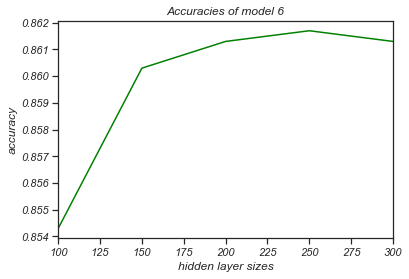

In [75]:
df_6.plot(kind='line', x='hidden layer sizes', y='accuracies', 
          legend=False, title="Accuracies of model 6",
          color="green")
plt.ylabel("accuracy")
plt.show()

Increasing the hidden layer sizes improves the accuracy slightly.

#### Building models with hyperparameter tuning using randomized

##### Neural network 7: hyperparameter tuning using randomized grid search

In [105]:
activation_list = ["logistic", "tanh", "relu"]
print(activation_list)
hidden_layer_sizes_list = list(np.arange(200, 300, 50))
print(hidden_layer_sizes_list)
solver_list = ["sgd", "adam"]
print(solver_list)
# learning_rate_init_list = [0.1, 0.01, 0.001]
# print(learning_rate_init_list)
# learning_rate_list = ["constant", "invscaling", "adaptive"]
# print(learning_rate_list)

['logistic', 'tanh', 'relu']
[200, 250]
['sgd', 'adam']


In [106]:
param_grid_1= {'hidden_layer_sizes': hidden_layer_sizes_list,
               'activation':activation_list,
               'solver': solver_list,    
               # 'learning_rate' : learning_rate_list,
               # 'learning_rate' : learning_rate_init_list
             }

print(param_grid_1)


{'hidden_layer_sizes': [200, 250], 'activation': ['logistic', 'tanh', 'relu'], 'solver': ['sgd', 'adam']}


In [107]:
import time
start = time.time()

clf_rs = \
RandomizedSearchCV(MLPClassifier(verbose=True, max_iter=10000), param_grid_1, cv=5, 
             scoring='accuracy')
clf_rs.fit(X_train_44, np.array(y_train_44).ravel())

end = time.time()
print(end - start)

Iteration 1, loss = 0.68358142
Iteration 2, loss = 0.65201607
Iteration 3, loss = 0.62202221
Iteration 4, loss = 0.59593182
Iteration 5, loss = 0.57310674
Iteration 6, loss = 0.55298567
Iteration 7, loss = 0.53534795
Iteration 8, loss = 0.51936020
Iteration 9, loss = 0.50519175
Iteration 10, loss = 0.49249490
Iteration 11, loss = 0.48114062
Iteration 12, loss = 0.47093867
Iteration 13, loss = 0.46175404
Iteration 14, loss = 0.45351618
Iteration 15, loss = 0.44614299
Iteration 16, loss = 0.43944642
Iteration 17, loss = 0.43342232
Iteration 18, loss = 0.42800212
Iteration 19, loss = 0.42308221
Iteration 20, loss = 0.41866341
Iteration 21, loss = 0.41463436
Iteration 22, loss = 0.41095559
Iteration 23, loss = 0.40765327
Iteration 24, loss = 0.40461366
Iteration 25, loss = 0.40185488
Iteration 26, loss = 0.39933711
Iteration 27, loss = 0.39698383
Iteration 28, loss = 0.39488460
Iteration 29, loss = 0.39290739
Iteration 30, loss = 0.39111565
Iteration 31, loss = 0.38945775
Iteration 32, los

In [82]:
clf_rs.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'hidden_layer_sizes': [200, 250], 'activation': ['logistic', 'tanh', 'relu'], 'solver': ['sgd', 'adam']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)>

In [85]:
clf_rs.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=250, learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [93]:
random_grid_search = clf_rs.best_score_
print(random_grid_search)

0.866


In [92]:
print(clf_rs.scorer_ ) 
print(clf_rs.n_splits_ )

make_scorer(accuracy_score)
5


In [96]:
new_row4 = {'model':'Random Grid Search', 'accuracy': random_grid_search }
df_acc=df_acc.append(new_row4, ignore_index=True)
 

In [98]:
df_acc.sort_values(by="accuracy", ascending=False)

,model,accuracy
6,Random Grid Search,0.8660
7,Random Grid Search,0.8660
8,Random Grid Search,0.8660
4,m5 - relu - hidden,0.8617
5,m6 - relu - hidden,0.8617
2,mlp relu 10,0.8600
0,logreg,0.8253
1,mlp logistic 10,0.8253
3,m4 - sigmoid - hidden,0.8253


Random grid search improved the accuracy of predictions.